In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random
import seaborn as sns

plt.rcParams['text.usetex'] = True
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 22

import warnings
warnings.filterwarnings("ignore")

from zwad.ad.preprocess import load_dataset
from zwad.ad.postprocess import load_ad_tables_by_patterns
from zwad.utils import latex_feature_names

In [2]:
# Load M31 data

m31_oid, m31_features = load_dataset('../data/oid_m31.dat', '../data/feature_m31.dat', '../data/feature_m31.name')
m31 = pd.DataFrame(m31_features, index=m31_oid)
m31.rename(columns=latex_feature_names('../data/latex_feature_names.csv'), inplace=True)
m31

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Cusum,Periodogram $\eta$,Periodogram Inter-percentile range,Periodogram Standard Deviation,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean
695211400017839,0.699500,0.227941,0.036765,0.128972,1.576097,4.729054e+09,0.212000,0.450199,3.944156,-1.639586e-03,...,0.148243,0.038084,0.959692,1.045485,9.733143,1.391858,-1.312442,0.202145,0.664184,20.516939
695211400043887,0.443000,0.288889,0.044444,0.179944,1.524735,3.644123e+09,0.204000,0.400000,0.133404,-5.124543e-06,...,0.156987,0.032495,0.875076,0.984689,10.104938,0.548229,-0.357512,0.163288,0.792986,20.698317
695211400043454,0.589499,0.280000,0.032000,0.191169,1.652675,2.317022e+09,0.204500,0.484001,1.439840,4.769120e-05,...,0.144973,0.031337,0.856762,0.939969,7.261847,0.791332,-0.746378,0.190502,0.728758,20.749649
695211400042791,0.604000,0.261745,0.053691,0.158801,1.574722,1.996893e+09,0.203499,0.433001,1.735631,8.042025e-04,...,0.159723,0.033665,0.761747,0.886971,8.016976,0.915853,-0.816090,0.178804,0.737000,20.493862
695211400016239,0.825500,0.196203,0.025316,0.085341,1.951849,2.571876e+09,0.155001,0.323599,18.212532,-2.264037e-03,...,0.176922,0.049399,0.618860,0.638475,5.355614,1.734685,-2.598536,0.162091,0.504324,20.329548
695211400130636,0.755000,0.291262,0.058252,0.148561,1.811533,1.787588e+09,0.318750,0.667599,0.975436,1.491155e-03,...,0.156039,0.018062,0.833467,0.760654,4.957766,2.412186,-0.025336,0.272547,0.717568,20.293999
695211400020822,0.359000,0.281407,0.035176,0.069087,1.919766,6.825739e+09,0.112000,0.235802,2.859599,3.075226e-04,...,0.143250,0.033057,0.756206,0.748621,6.893010,0.643574,-0.822030,0.097358,0.714303,19.775906
695211400046489,0.721500,0.234234,0.063063,0.167082,1.860691,2.305156e+09,0.232500,0.448801,2.767556,4.084874e-04,...,0.148862,0.041687,0.925770,0.865271,4.546683,0.974015,-0.698955,0.211857,0.703871,20.806570
695211400042524,0.478499,0.252174,0.052174,0.140025,1.571182,4.056119e+09,0.197001,0.454000,0.678151,2.702705e-04,...,0.165747,0.045740,0.767731,0.815489,8.178713,0.579579,-0.335617,0.183544,0.754838,20.912270
695211400044584,0.410000,0.270115,0.063218,0.140093,1.624443,2.278564e+09,0.178999,0.373301,0.479148,1.255354e-04,...,0.164841,0.032915,0.852562,0.901200,11.398070,0.676003,-0.521176,0.151585,0.767441,20.379196


In [3]:
# Lead full expert list of anomalies with comments, indexed by anomalies oid

m31_maria_list = pd.read_csv('../data/m31_maria.csv')
m31_maria_list = m31_maria_list.set_index('oid')
m31_maria_list

,-1,tag,tag_detailed,Comments,Unnamed: 5
oid,,,,,
695211400034403,0,artefact,bright star,NaN,NaN
695211400124577,1,artefact,bright star,NaN,NaN
695211400102351,2,artefact,bright star,NaN,NaN
695211400053697,3,artefact,bright star,NaN,NaN
695211400000352,4,artefact,bright star,NaN,NaN
695211400088968,5,artefact,NaN,NaN,NaN
695211400117334,6,artefact,bright star,NaN,NaN
695211400028274,7,artefact,bright star,NaN,NaN
695211400133827,8,artefact,NaN,empty field fits,NaN


In [4]:
# From full data list (M31), only select oid that match those in expert anomalies list

m31_out = m31.loc[m31_maria_list.index]
#m31_out.to_csv('../data/m31_outliers_table.csv')
m31_out

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Cusum,Periodogram $\eta$,Periodogram Inter-percentile range,Periodogram Standard Deviation,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.380000,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,0.118531,0.011458,0.861847,1.873147,28.882809,1568.272339,0.410859,1.097088,0.875042,16.457632
695211400124577,2.044500,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,0.112881,0.019039,0.824700,0.893768,9.279490,1209.481201,0.397880,1.082259,0.903058,16.626255
695211400102351,2.362000,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,0.144106,0.022466,0.992880,0.968951,8.050076,747.957153,0.321721,1.132575,0.900563,17.092886
695211400053697,2.212500,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,0.182627,0.026980,1.074533,0.876942,4.537641,1371.101685,0.280188,0.917519,0.851317,16.688284
695211400000352,2.400000,0.288288,0.045045,0.160094,1.602353,9.396195e+08,1.299751,2.475200,0.269096,-0.001185,...,0.143338,0.017688,0.736078,1.019456,9.457602,1488.709473,0.583173,0.983108,0.864887,16.493820
695211400088968,1.766000,0.335938,0.015625,0.237473,0.970532,6.698904e+08,1.466000,2.213600,-0.972853,0.001522,...,0.171669,0.024452,0.879558,1.562311,14.599635,617.243286,0.366902,0.866335,0.870992,17.032112
695211400117334,2.017000,0.304000,0.040000,0.225917,1.219688,1.659339e+09,1.389252,2.385000,0.346864,-0.001382,...,0.152174,0.012302,0.955405,1.669254,18.446514,564.353943,0.899401,0.931375,0.892021,17.024920
695211400028274,2.113000,0.318519,0.044444,0.155424,1.620563,1.274164e+09,1.290501,2.348999,-0.431219,-0.001148,...,0.158261,0.011947,1.023619,1.243340,12.130541,1059.956909,-0.033797,0.905951,0.876673,16.931715
695211400133827,2.180000,0.370000,0.020000,0.268216,0.931083,6.939510e+07,1.393997,2.275499,-0.315073,0.000728,...,0.161987,0.015354,0.857513,1.317902,11.432131,657.535339,0.559455,0.887947,0.889247,16.999174


# Create final table with tag comments like artefact

In [5]:
# Combine features data in anomalies with associated comments/tags
m31_final_out = pd.concat([m31_out, m31_maria_list], axis=1)
m31_final_out.to_csv('../data/m31_anomalies_table_with_tags.csv')
m31_final_out

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean,-1,tag,tag_detailed,Comments,Unnamed: 5
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.380000,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,1568.272339,0.410859,1.097088,0.875042,16.457632,0,artefact,bright star,NaN,NaN
695211400124577,2.044500,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,1209.481201,0.397880,1.082259,0.903058,16.626255,1,artefact,bright star,NaN,NaN
695211400102351,2.362000,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,747.957153,0.321721,1.132575,0.900563,17.092886,2,artefact,bright star,NaN,NaN
695211400053697,2.212500,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,1371.101685,0.280188,0.917519,0.851317,16.688284,3,artefact,bright star,NaN,NaN
695211400000352,2.400000,0.288288,0.045045,0.160094,1.602353,9.396195e+08,1.299751,2.475200,0.269096,-0.001185,...,1488.709473,0.583173,0.983108,0.864887,16.493820,4,artefact,bright star,NaN,NaN
695211400088968,1.766000,0.335938,0.015625,0.237473,0.970532,6.698904e+08,1.466000,2.213600,-0.972853,0.001522,...,617.243286,0.366902,0.866335,0.870992,17.032112,5,artefact,NaN,NaN,NaN
695211400117334,2.017000,0.304000,0.040000,0.225917,1.219688,1.659339e+09,1.389252,2.385000,0.346864,-0.001382,...,564.353943,0.899401,0.931375,0.892021,17.024920,6,artefact,bright star,NaN,NaN
695211400028274,2.113000,0.318519,0.044444,0.155424,1.620563,1.274164e+09,1.290501,2.348999,-0.431219,-0.001148,...,1059.956909,-0.033797,0.905951,0.876673,16.931715,7,artefact,bright star,NaN,NaN
695211400133827,2.180000,0.370000,0.020000,0.268216,0.931083,6.939510e+07,1.393997,2.275499,-0.315073,0.000728,...,657.535339,0.559455,0.887947,0.889247,16.999174,8,artefact,NaN,empty field fits,NaN


# LOOKING AT PHASE SPACES WITH EXPERT TAGS

# Make combined M31 all data scatter + M31 anomalies only

In [6]:
m31_final_anom = m31_final_out.loc[m31_final_out.tag != 'artefact']


In [7]:
m31_final_anom = m31_final_anom.replace({'Var': 'Variable', 
                        'Cl*': 'In Star Cluster',
                        'transient': 'Transient',
                        'uncat': 'Uncategorised',
                        'RSG': 'Red Supergiant'})

m31_final_out_format_tag = m31_final_out.replace({'Var': 'Variable', 
                        'artefact': 'Artefact',
                        'Cl*': 'In Star Cluster',
                        'transient': 'Transient',
                        'uncat': 'Uncategorised',
                        'RSG': 'Red Supergiant'})

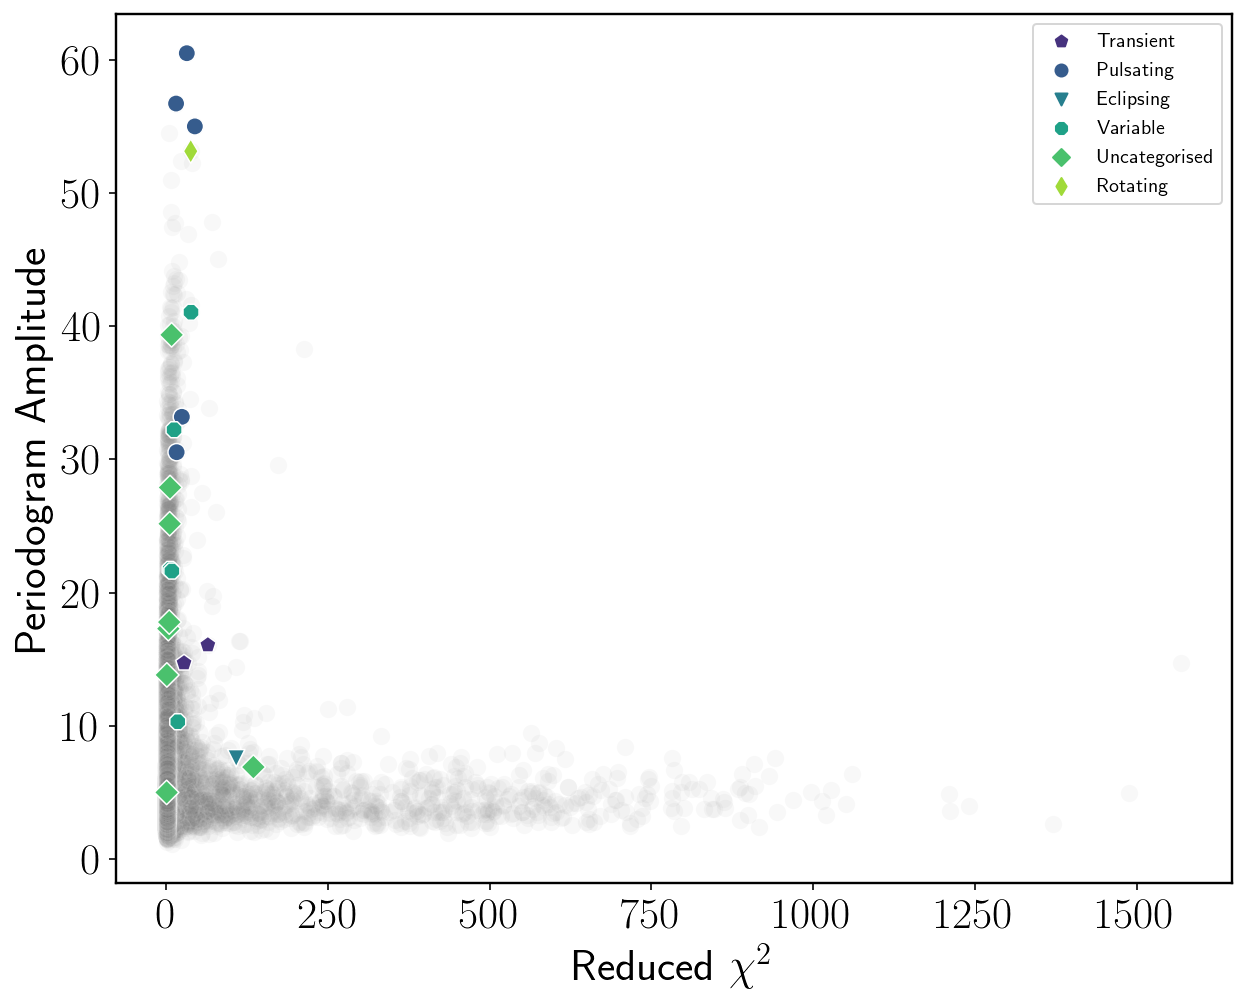

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"Variable": "8", "In Star Cluster": "s", "Transient": "p", "Uncategorised": "D", "Red Supergiant": "h", 
           "Cataclysmic": "^", "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">",
           "Rotating": "d",}

sns.scatterplot(x="Reduced~$\chi^2$", y="Periodogram Amplitude", data=m31, marker="o", color='grey', s=75, alpha=0.05)
sns.scatterplot(x="Reduced~$\chi^2$", y="Periodogram Amplitude", data=m31_final_anom, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=75)

#set plot params
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

#plt.savefig('../figs/phase_spaces/chi2_periodamp_m31_vs_anom.png', format='png', dpi=300, bbox_inches='tight')

# Repeat above but now all m31 vs outliers (artefacts + anomalies)

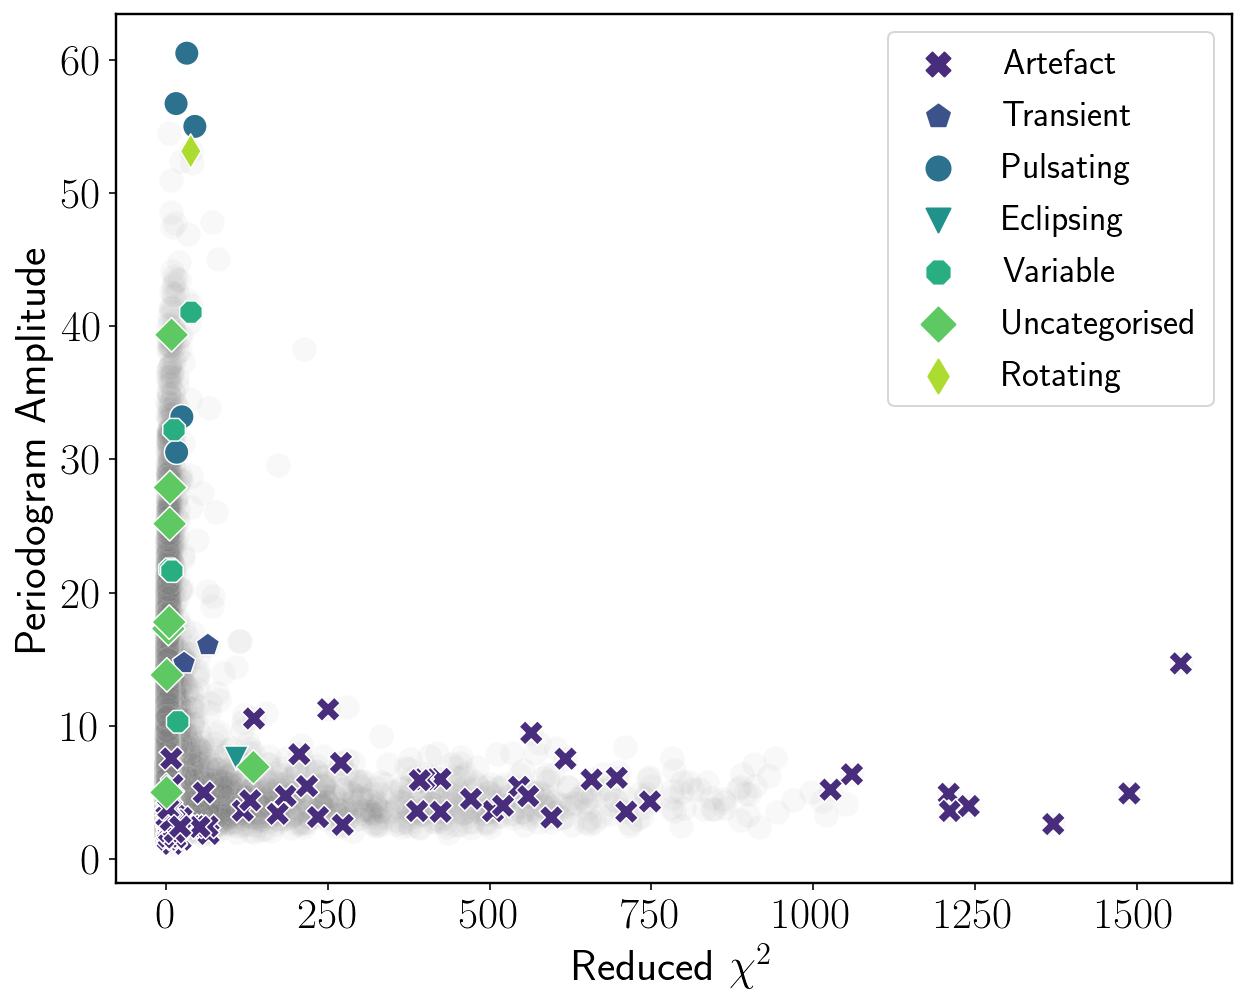

In [9]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"Artefact": "X", "Variable": "8", "In Star Cluster": "s", "Transient": "p", "Uncategorised": "D", "Red Supergiant": "h", 
           "Cataclysmic": "^", "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">",
           "Rotating": "d"}

sns.scatterplot(x=r"Reduced~$\chi^2$", y="Periodogram Amplitude", data=m31, marker="o", color='grey', s=150, alpha=0.05)
sns.scatterplot(x=r"Reduced~$\chi^2$", y="Periodogram Amplitude", data=m31_final_out_format_tag, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=150)

#set plot params
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], fontsize=18, markerscale=2)

plt.savefig('../figs/phase_spaces/chi2_periodamp_m31_vs_out.png', format='png', dpi=300, bbox_inches='tight')

In [10]:
np.where(m31_final_out_format_tag.tag == 'Artefact') # 79 artefacts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),)

In [11]:
np.where(m31_final_out_format_tag.tag == 'Uncategorised') # 8 uncategorised (consistent w/ paper)

(array([87, 88, 89, 90, 93, 94, 95, 96]),)

# Try w/ Bokeh to recover objectIds -> plug into SNAD viewer for verification

In [12]:
import seaborn as sns
from bokeh.io import output_file, show,curdoc
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
from bokeh.models import Quad, Legend
from bokeh.layouts import row, layout,widgetbox
from bokeh.models.widgets import Select,MultiSelect
from bokeh.models import ColorBar
from bokeh.plotting import ColumnDataSource,Figure,reset_output,gridplot
from bokeh.io import output_notebook # enables plot interface in J notebook
output_notebook()

source = ColumnDataSource(data=dict(objectid=np.array(m31.index),
                            chi2=np.array(m31[r'Reduced~$\chi^2$']),
                            periodamp=np.array(m31['Periodogram Amplitude']),
                           )
                 )

source2 = ColumnDataSource(data=dict(objectid=np.array(m31_final_out.index),
                            chi2=np.array(m31_final_out[r'Reduced~$\chi^2$']),
                            periodamp=np.array(m31_final_out['Periodogram Amplitude']),
                           )
                 )

# for interactive hover tool
TOOLTIPS=[
    ("ObjectID", "@objectid"),
]

plot = Figure(plot_height = 500, plot_width = 600, toolbar_location=None, tooltips=TOOLTIPS)
plot.circle(x='chi2', y='periodamp', fill_alpha=0.5, source=source, size=5, fill_color = 'grey', 
            legend='in M31', line_color=None)
plot.circle(x='chi2', y='periodamp', fill_alpha=0.5, source=source2, size=5, fill_color = 'orange', 
            legend='outlier in M31', line_color=None)


plot.xaxis.axis_label = "chi2"
plot.yaxis.axis_label = "period_amplitude"
legend = Legend(location=(0, 30))
plot.add_layout(legend)

show(plot)

Loading BokehJS ...

# Repeat chi2 vs period_amp in Deep, Disk datasets

In [13]:
# Load Deep data

deep_oid, deep_features = load_dataset('../data/oid_deep.dat', '../data/feature_deep.dat', '../data/feature_deep.name')
deep = pd.DataFrame(deep_features, index=deep_oid)
deep.rename(columns=latex_feature_names('../data/latex_feature_names.csv'), inplace=True)
deep

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Cusum,Periodogram $\eta$,Periodogram Inter-percentile range,Periodogram Standard Deviation,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean
795216100016711,0.540999,0.384615,0.038462,0.132028,1.397621,5.995161e+08,0.384998,0.626499,-0.370707,0.000028,...,0.158873,0.046190,0.988132,1.153393,12.302343,2.094434,-0.561686,0.243355,0.819022,20.531246
795216200000160,0.555500,0.309091,0.045455,0.150656,1.558752,2.858594e+09,0.257999,0.555500,0.195134,-0.000409,...,0.177428,0.015411,0.810837,0.988667,8.658415,1.084765,-0.186345,0.204943,0.773804,20.622486
795216200000423,0.682500,0.263566,0.062016,0.135337,1.415388,1.171590e+09,0.249001,0.525002,2.017293,-0.000368,...,0.137916,0.049931,0.924430,1.028984,6.990223,1.522744,-0.782636,0.212639,0.718653,20.564688
795216200021594,0.471500,0.324561,0.035088,0.120368,1.609693,1.157334e+09,0.191000,0.423700,0.339782,0.000081,...,0.154165,0.064802,1.049195,1.079942,10.374885,1.000001,-0.109285,0.165479,0.763212,20.291206
795216100016924,0.707000,0.330275,0.027523,0.222071,1.255422,1.167658e+09,0.350498,0.581999,0.391907,-0.000741,...,0.189391,0.012856,0.738287,1.210104,9.334059,1.520369,-0.238332,0.242174,0.775877,20.811619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795202400008499,0.091500,0.288390,0.033708,0.260133,1.086497,8.582294e+09,0.023000,0.047600,4.213814,0.000180,...,0.165052,0.029675,0.666062,1.225024,46.324841,3.317819,-0.502687,0.020036,0.753349,14.698151
795202400035369,0.509000,0.274336,0.079646,0.154595,1.399596,3.628485e+09,0.209000,0.486799,0.559496,0.000914,...,0.191887,0.031261,0.762117,0.960851,12.348410,3.105192,-0.516846,0.189333,0.753971,20.020897
795202400008473,0.248000,0.225806,0.046595,0.153000,1.614792,5.882888e+09,0.056499,0.110001,5.453317,0.000202,...,0.122866,0.031222,0.750759,0.913361,16.291544,1.183683,0.588551,0.051008,0.729488,18.820463
795202400026124,0.506001,0.285124,0.053719,0.077786,1.764071,1.560587e+10,0.168001,0.353199,1.486499,0.000263,...,0.157890,0.029492,0.697904,0.765475,10.299134,1.628370,-0.241796,0.145307,0.733241,20.069075


In [14]:
# Lead full expert list of anomalies with comments, indexed by anomalies oid

deep_maria_list = pd.read_csv('../data/deep_maria.csv', encoding='latin-1')
deep_maria_list = deep_maria_list.set_index('oid')
deep_maria_list

,-1,tag,tag_detailed,Comments
oid,,,,
795206400033919,0,artefact,ghost,dispersed LC
795215300016556,1,artefact,bright star,NaN
795206400037347,2,artefact,ghost,NaN
795206400027989,3,artefact,ghost,NaN
795206400000500,4,artefact,plane/flying body,1-point up
...,...,...,...,...
795213200000671,108,transient,SN candidate,NaN
795214400010189,109,uncat,NaN,NaN
795215300023129,110,uncat,NaN,NaN


In [15]:
# From full data list (Deep), only select oid that match those in expert anomalies list

deep_out = deep.loc[deep_maria_list.index]
deep_out.to_csv('../data/deep_outliers_table.csv')
deep_out

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Cusum,Periodogram $\eta$,Periodogram Inter-percentile range,Periodogram Standard Deviation,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean
oid,,,,,,,,,,,,,,,,,,,,,
795206400033919,2.292000,0.313043,0.060870,0.261737,1.085244,3.365883e+08,1.058500,1.896999,0.537647,0.006707,...,0.146361,0.056470,0.970831,1.397647,16.589664,865.153015,0.000233,0.754175,0.768493,17.511314
795215300016556,2.093000,0.194444,0.037037,0.196048,1.349862,4.237551e+08,0.623501,1.262100,6.614486,-0.009735,...,0.171377,0.032179,1.176904,1.002925,4.685466,1273.586792,-1.982914,0.629839,0.691001,17.662052
795206400037347,1.638500,0.323529,0.039216,0.267200,1.211233,3.329044e+08,1.010000,2.163099,-0.522838,0.005826,...,0.148326,0.054646,0.934767,1.215428,11.513749,349.777008,0.221811,0.759750,0.851602,17.999578
795206400027989,1.900000,0.250000,0.073171,0.247646,1.125499,4.679685e+08,0.687000,1.345900,1.555700,0.005763,...,0.146329,0.045439,0.982171,1.676084,20.519276,774.760620,-0.428784,0.603321,0.752392,17.590780
795206400000500,3.421000,0.041379,0.006897,0.104767,1.850162,1.077397e+08,0.277250,0.625999,96.077843,-0.049087,...,0.289417,0.075695,0.706046,0.543299,3.404447,697.919312,-8.902019,0.574338,0.871037,16.826391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795213200000671,0.748500,0.242331,0.042945,0.328418,0.456679,2.432724e+09,0.300001,0.631599,2.611583,0.005242,...,0.146987,0.022674,0.744008,1.902317,82.063881,12.579952,-1.462108,0.282544,0.726057,19.769327
795214400010189,0.319500,0.335979,0.026455,0.105258,1.888044,9.513464e+09,0.158000,0.266100,-0.235376,0.000435,...,0.141149,0.022849,0.722792,0.775890,7.920803,88.348007,0.020499,0.103393,0.826403,14.316817
795215300023129,0.237499,0.354756,0.033419,0.172951,1.387216,1.118431e+10,0.184000,0.263000,-0.669927,0.000712,...,0.169035,0.023744,0.694582,1.046304,26.965397,62.861073,-0.554784,0.106801,0.865866,16.731724


In [16]:
# Combine features data in anomalies with associated comments/tags
deep_final_out = pd.concat([deep_out, deep_maria_list], axis=1)
#deep_final_anom.to_csv('../data/deep_anomalies_table_with_tags.csv')
deep_final_out

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean,-1,tag,tag_detailed,Comments
oid,,,,,,,,,,,,,,,,,,,,,
795206400033919,2.292000,0.313043,0.060870,0.261737,1.085244,3.365883e+08,1.058500,1.896999,0.537647,0.006707,...,16.589664,865.153015,0.000233,0.754175,0.768493,17.511314,0,artefact,ghost,dispersed LC
795215300016556,2.093000,0.194444,0.037037,0.196048,1.349862,4.237551e+08,0.623501,1.262100,6.614486,-0.009735,...,4.685466,1273.586792,-1.982914,0.629839,0.691001,17.662052,1,artefact,bright star,NaN
795206400037347,1.638500,0.323529,0.039216,0.267200,1.211233,3.329044e+08,1.010000,2.163099,-0.522838,0.005826,...,11.513749,349.777008,0.221811,0.759750,0.851602,17.999578,2,artefact,ghost,NaN
795206400027989,1.900000,0.250000,0.073171,0.247646,1.125499,4.679685e+08,0.687000,1.345900,1.555700,0.005763,...,20.519276,774.760620,-0.428784,0.603321,0.752392,17.590780,3,artefact,ghost,NaN
795206400000500,3.421000,0.041379,0.006897,0.104767,1.850162,1.077397e+08,0.277250,0.625999,96.077843,-0.049087,...,3.404447,697.919312,-8.902019,0.574338,0.871037,16.826391,4,artefact,plane/flying body,1-point up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795213200000671,0.748500,0.242331,0.042945,0.328418,0.456679,2.432724e+09,0.300001,0.631599,2.611583,0.005242,...,82.063881,12.579952,-1.462108,0.282544,0.726057,19.769327,108,transient,SN candidate,NaN
795214400010189,0.319500,0.335979,0.026455,0.105258,1.888044,9.513464e+09,0.158000,0.266100,-0.235376,0.000435,...,7.920803,88.348007,0.020499,0.103393,0.826403,14.316817,109,uncat,NaN,NaN
795215300023129,0.237499,0.354756,0.033419,0.172951,1.387216,1.118431e+10,0.184000,0.263000,-0.669927,0.000712,...,26.965397,62.861073,-0.554784,0.106801,0.865866,16.731724,110,uncat,NaN,NaN


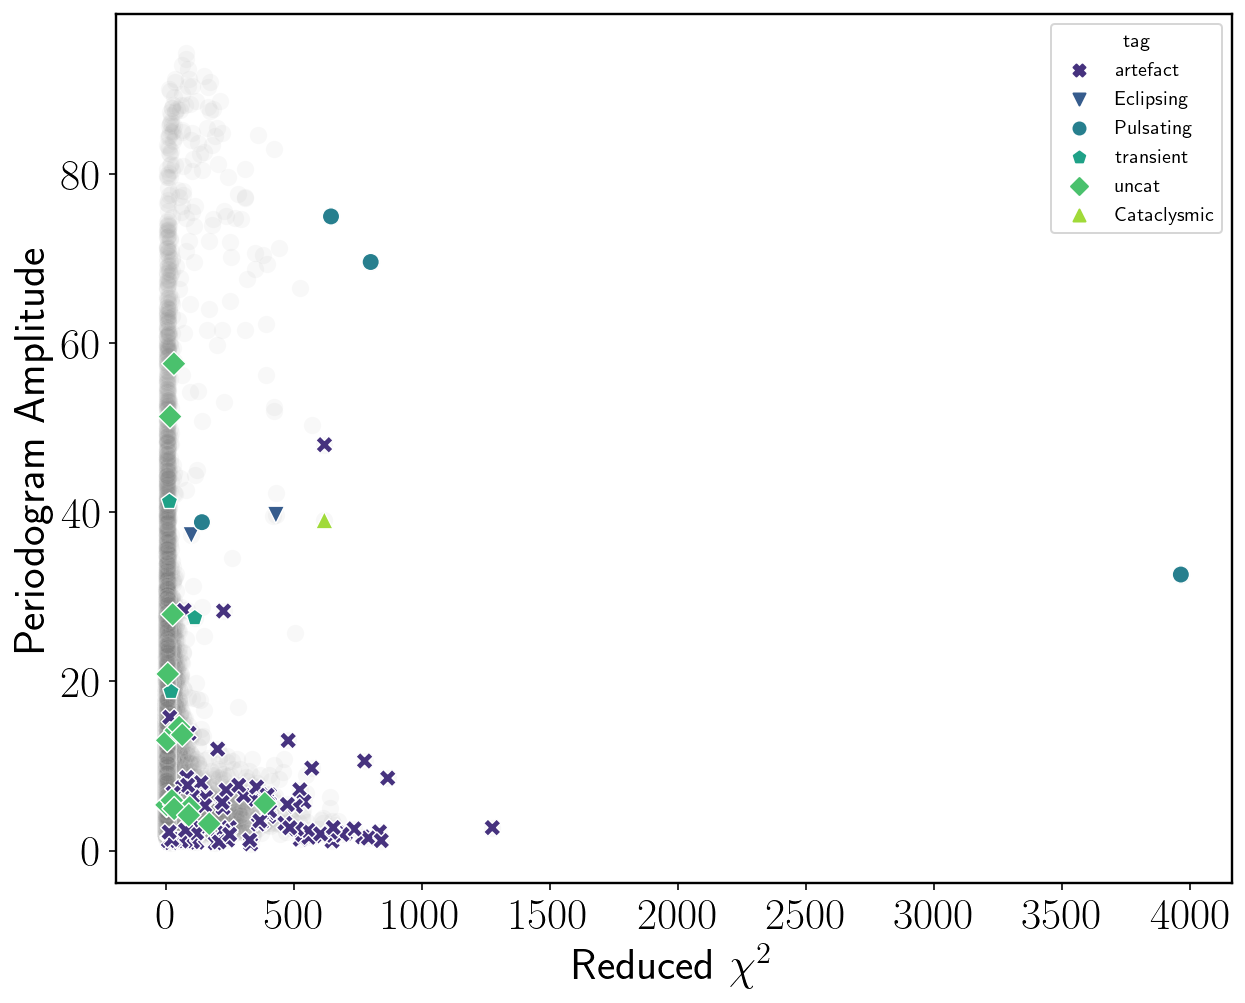

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"artefact": "X", "atrefact": "X", "Var": "8", "Cl*": "s", "transient": "p", "uncat": "D", "RSG": "h", "Cataclysmic": "^",
           "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">", 
           "Mira_projected": "H", "SN": "s", "Сataclysmic":"^", "SN candidate": "d"}

sns.scatterplot(x=r"Reduced~$\chi^2$", y="Periodogram Amplitude", data=deep, marker="o", color='grey', s=75, alpha=0.05)
sns.scatterplot(x=r"Reduced~$\chi^2$", y="Periodogram Amplitude", data=deep_final_out, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=75)

#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

plt.savefig('../figs/phase_spaces/chi2_periodamp_deep_vs_out.png', format='png', dpi=300, bbox_inches='tight')

# Disk

In [18]:
# Load Disk data

disk_oid, disk_features = load_dataset('../data/oid_disk.dat', '../data/feature_disk.dat', '../data/feature_disk.name')
disk = pd.DataFrame(disk_features, index=disk_oid)
disk.rename(columns=latex_feature_names('../data/latex_feature_names.csv'), inplace=True)

# Lead full expert list of anomalies with comments, indexed by anomalies oid

disk_maria_list = pd.read_csv('../data/disk_maria.csv')
disk_maria_list = disk_maria_list.set_index('oid')

# From full data list (Disk), only select oid that match those in expert anomalies list

disk_out = disk.loc[disk_maria_list.index]
disk_out.to_csv('../data/disk_outliers_table.csv')

# Combine features data in anomalies with associated comments/tags
disk_final_out = pd.concat([disk_out, disk_maria_list], axis=1)
disk_final_out.to_csv('../data/disk_anomalies_table_with_tags.csv')
disk_final_out

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean,-1,tag,tag_detailed,Comments
oid,,,,,,,,,,,,,,,,,,,,,
807208200059506,1.2450,0.556041,0.010189,0.436069,0.193589,2.098970e+08,1.110750,1.200001,-1.559890,0.001259,...,433.912689,2684.657471,0.256896,0.551287,0.955734,14.685699,0,Eruptive,INS,NaN
807206200014645,1.0550,0.499272,0.008734,0.459163,0.172865,4.834663e+08,1.085751,1.280802,-1.475494,-0.004737,...,378.467438,850.525940,-0.057167,0.584260,0.983030,16.858368,1,Var,"YSO, PMS",NaN
807209400037670,2.6350,0.137026,0.093294,0.363374,0.003849,1.788949e+07,0.078000,3.132701,2.865792,-0.015172,...,323.105438,5296.215820,2.069177,1.392957,0.697864,13.741411,2,Pulsating,Mira,NaN
807206400014916,2.1270,0.190962,0.096210,0.386210,0.002261,1.461632e+07,0.042001,3.111999,1.339401,-0.019156,...,325.213898,8932.713867,1.733728,1.280238,0.737946,13.626042,3,Pulsating,Mira:,NaN
807211300006190,1.9120,0.138889,0.124269,0.342863,0.004036,3.915773e+07,0.025500,2.886900,2.722776,-0.019971,...,299.425537,4941.455566,2.142377,1.052781,0.598213,13.975097,4,Pulsating,Mira,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807211300012948,0.7980,0.106725,0.077485,0.306547,0.009303,3.185641e+08,0.020000,0.408299,6.298812,-0.003292,...,238.747406,806.679565,2.735158,0.315369,0.606437,14.880305,58,Pulsating,Mira,"Xiaodian et al., 2020"
807201100022915,1.2390,0.173217,0.123726,0.257353,0.013961,1.777338e+08,0.054001,0.538000,4.170263,0.005717,...,275.307556,1640.615845,-1.091213,0.387884,0.567629,14.858141,59,Pulsating,Mira,NaN
807202100027080,0.5820,0.205839,0.062774,0.393846,0.256613,2.544936e+08,0.558250,0.966999,-0.580300,0.001060,...,332.237671,985.414001,0.949612,0.376731,0.866067,15.708345,60,Eclipsing,"DBF, EA","Xiaodian et al., 2020"


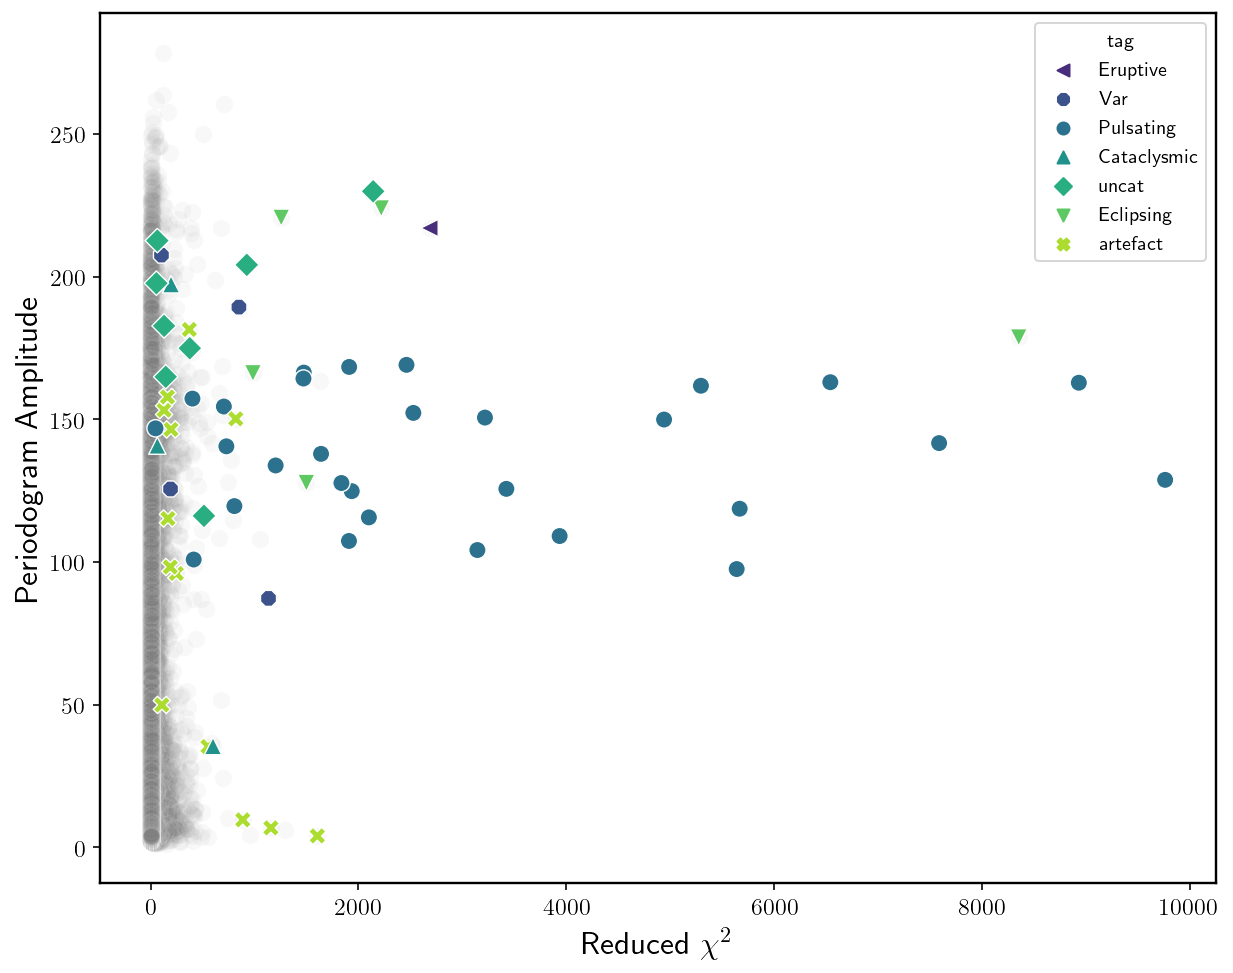

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

markers = {"artefact": "X", "atrefact": "X", "Var": "8", "Cl*": "s", "transient": "p", "uncat": "D", "RSG": "h", "Cataclysmic": "^",
           "Pulsating": "o", "Eclipsing": "v", "Star": "*", "Eruptive": "<", "Cepheid": ">", 
           "Mira_projected": "H", "SN": "s", "Сataclysmic":"^"}

sns.scatterplot(x=r"Reduced~$\chi^2$", y="Periodogram Amplitude", data=disk, marker="o", color='grey', s=75, alpha=0.05)
sns.scatterplot(x=r"Reduced~$\chi^2$", y="Periodogram Amplitude", data=disk_final_out, markers=markers, 
                style='tag', hue='tag', palette="viridis", s=75)

#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

plt.savefig('../figs/phase_spaces/chi2_periodamp_disk_vs_out.png', format='png', dpi=300, bbox_inches='tight')